In [1]:
from adversarial import *

In [3]:
cnn = load_model("trained_models/classifier.h5")
# input shape: (28, 28, 1)

cae = CAE.load("trained_models/epoch_200")
lava = LavaMultiSteps(cnn, cae.encoder, cae.decoder)

In [4]:
# input images
samples, sample_labels = load_samples_for_test(200)

# x = np.reshape(samples, (-1, 784))
y_onehot = tf.one_hot(tf.constant(sample_labels), depth=10).numpy()

K.set_learning_phase(0)


/home/congyu/anaconda3/envs/congyuAI/lib/python3.9/site-packages/keras/backend.py:401: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn('`tf.keras.backend.set_learning_phase` is deprecated and '


  0%|          | 0/200 [00:00<?, ?it/s]2024-07-04 14:05:15.408109: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2024-07-04 14:05:22.890091: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8201
2024-07-04 14:05:29.705723: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


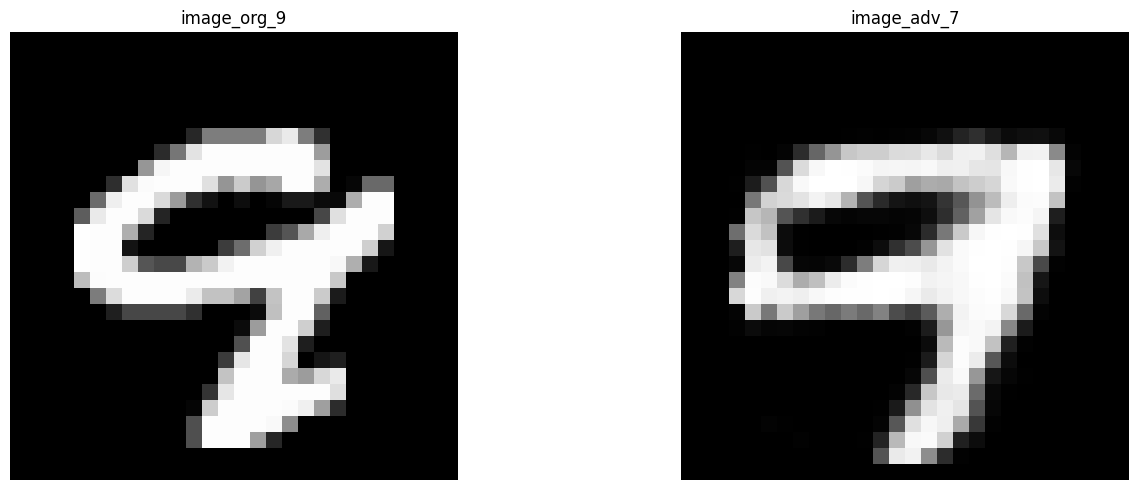

  0%|          | 1/200 [00:32<1:46:44, 32.18s/it]

kl: 0.6424111607487151


  2%|▎         | 5/200 [00:57<40:31, 12.47s/it]  

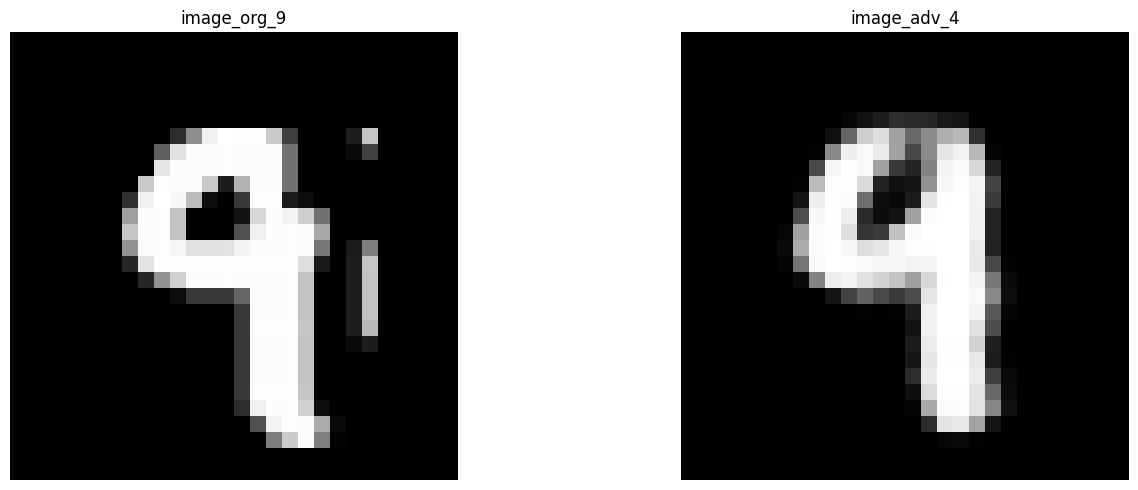

  3%|▎         | 6/200 [01:00<31:31,  9.75s/it]

kl: 0.6948291488524362


  4%|▍         | 9/200 [01:18<23:02,  7.24s/it]

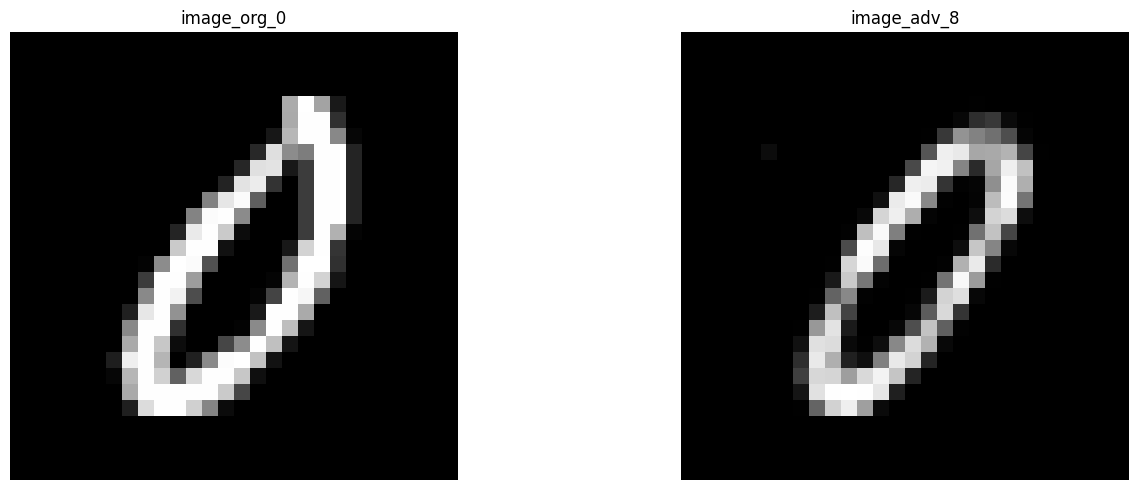

  5%|▌         | 10/200 [01:23<20:41,  6.54s/it]

kl: 0.601695744160385


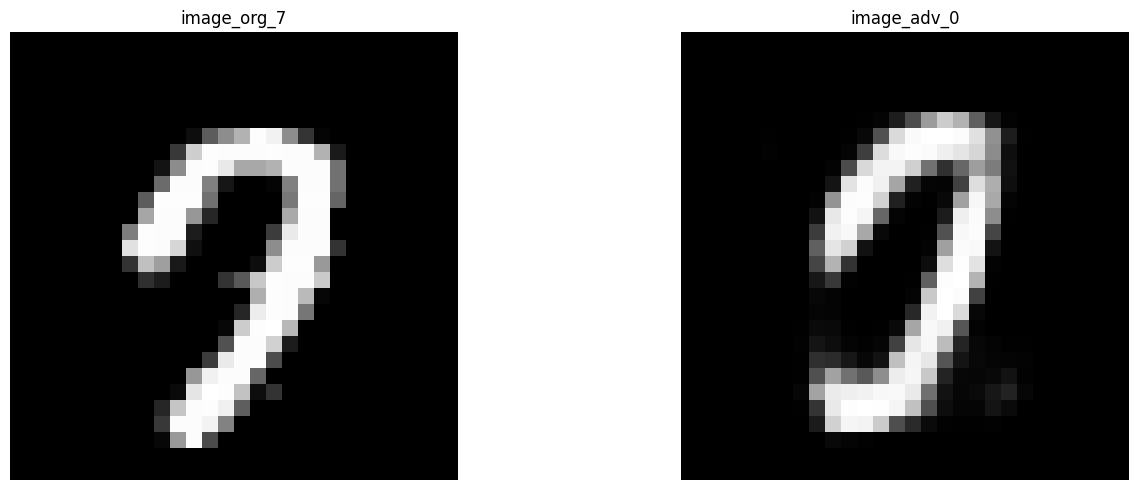

  6%|▌         | 11/200 [01:27<18:22,  5.83s/it]

kl: 0.4781025992954363


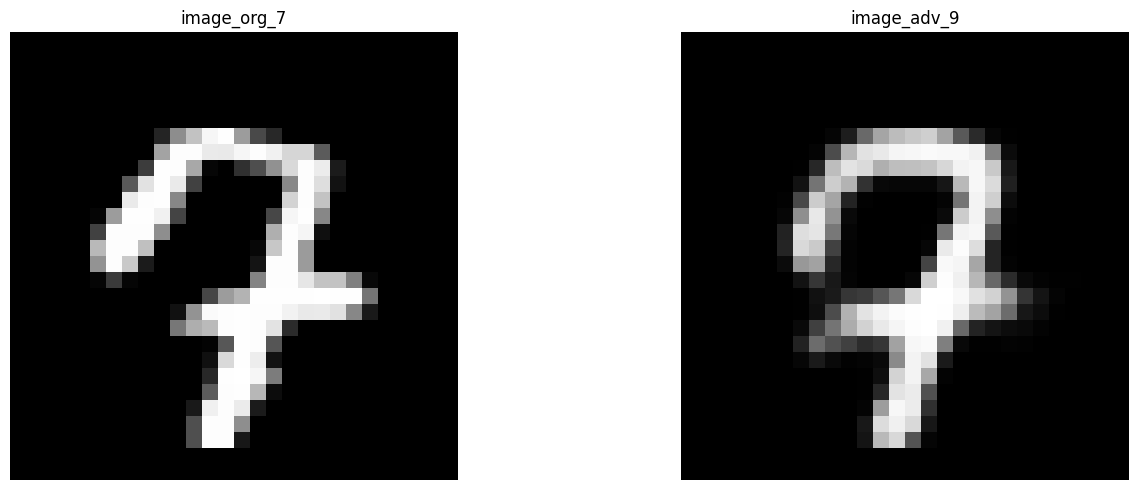

  6%|▌         | 12/200 [01:30<16:00,  5.11s/it]

kl: 0.33344155184489194


 10%|▉         | 19/200 [02:11<17:25,  5.77s/it]

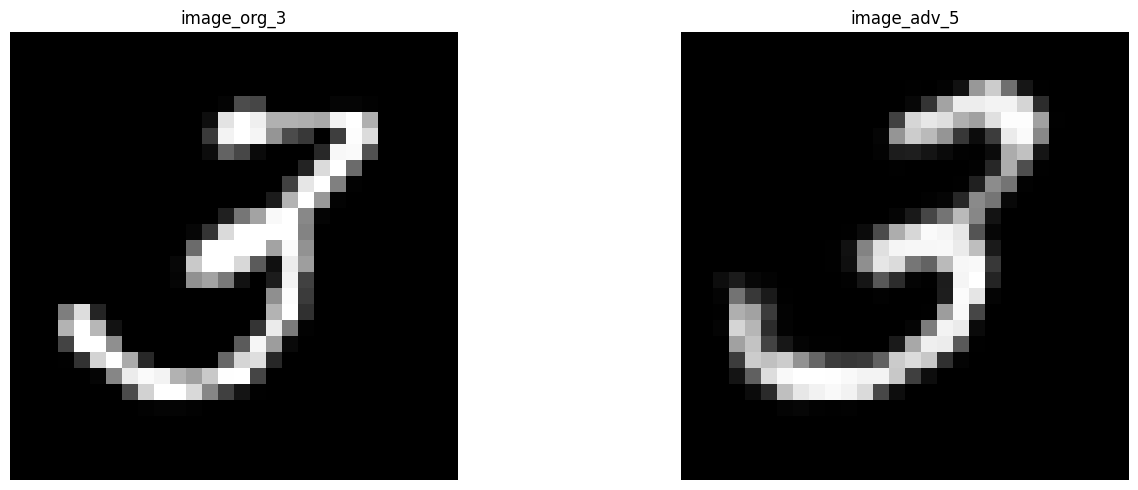

 10%|█         | 20/200 [02:12<12:49,  4.27s/it]

kl: 0.3471960328596383


 11%|█         | 22/200 [02:24<15:03,  5.07s/it]

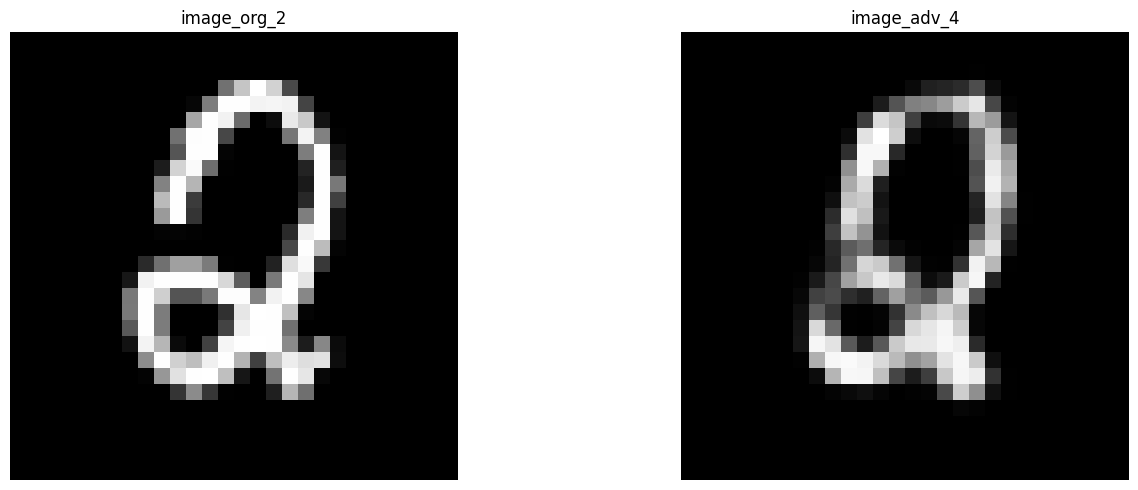

 12%|█▏        | 23/200 [02:28<14:10,  4.80s/it]

kl: 0.3714702527952808


 19%|█▉        | 38/200 [03:57<15:54,  5.89s/it]

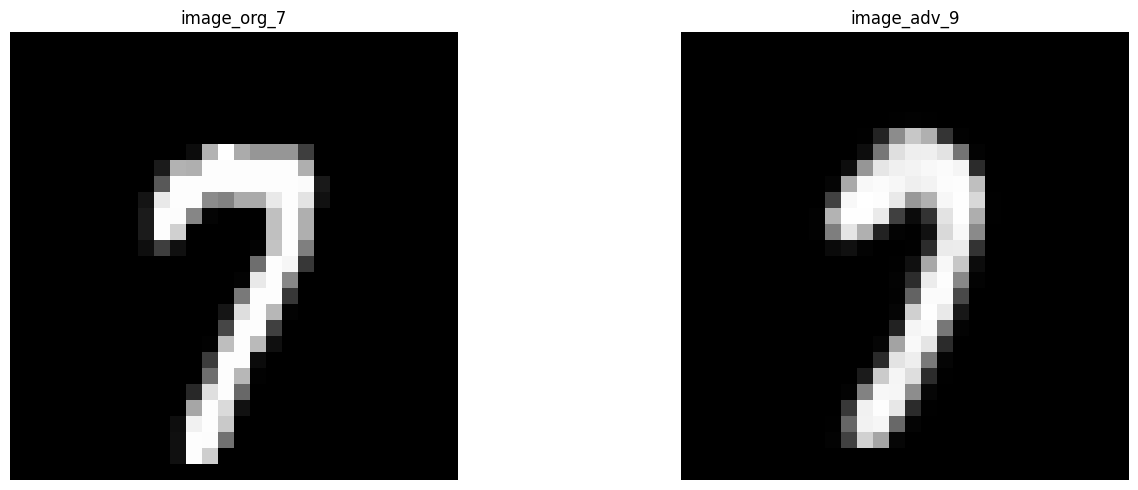

 20%|█▉        | 39/200 [04:04<16:43,  6.24s/it]

kl: 0.41763211902470637


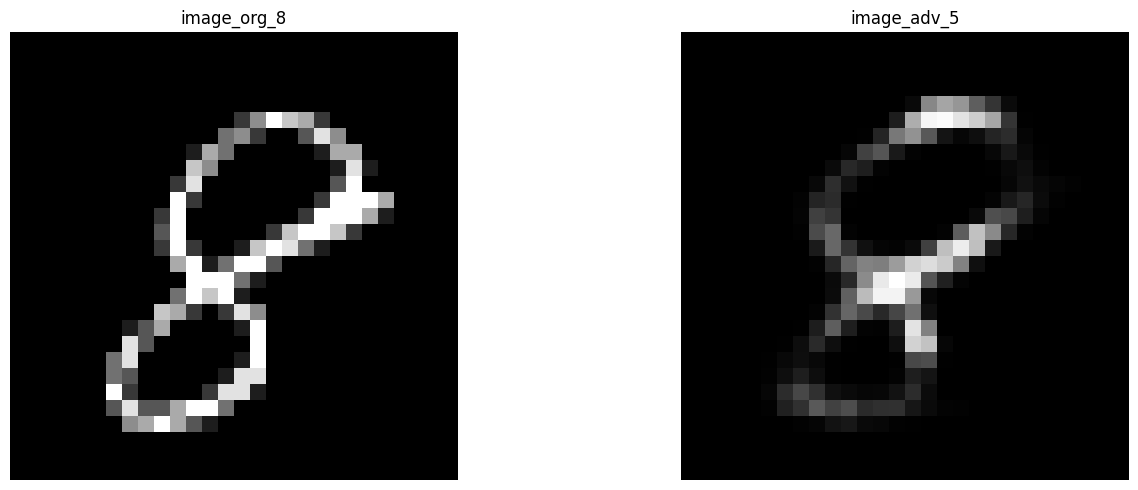

 20%|██        | 40/200 [04:08<14:55,  5.60s/it]

kl: 0.9682264299606641


 21%|██        | 42/200 [04:19<15:05,  5.73s/it]

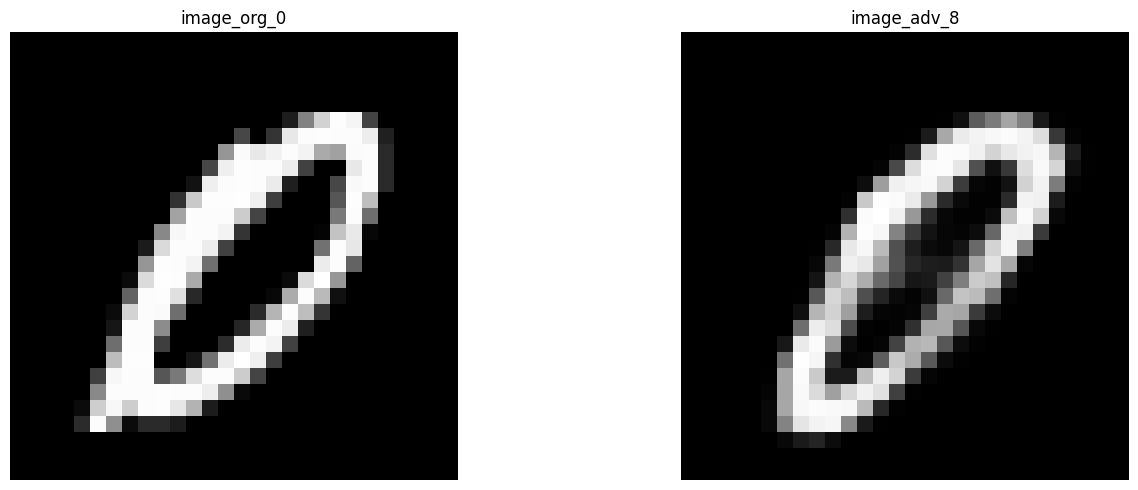

 22%|██▏       | 43/200 [04:36<23:33,  9.00s/it]

kl: 0.3055575114339395


 22%|██▎       | 45/200 [04:48<19:08,  7.41s/it]

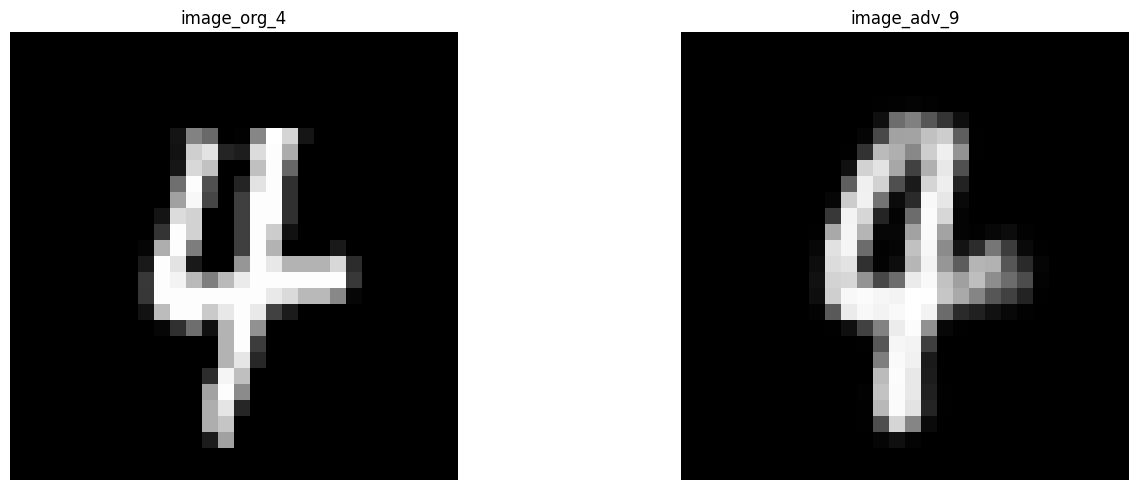

 23%|██▎       | 46/200 [04:49<14:11,  5.53s/it]

kl: 0.20469204060243668


 24%|██▍       | 48/200 [05:01<14:29,  5.72s/it]

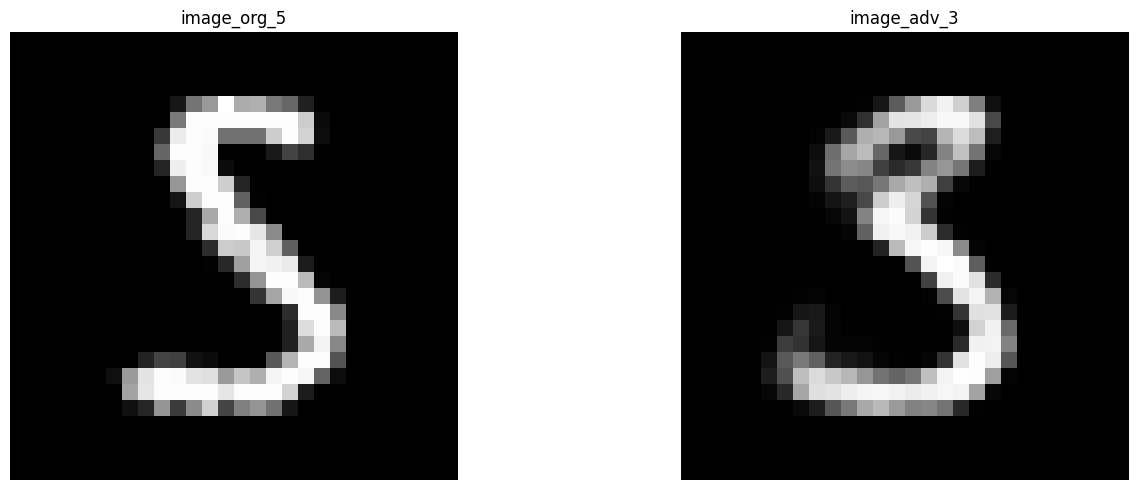

 24%|██▍       | 49/200 [05:09<16:14,  6.46s/it]

kl: 0.22900571175222648


 26%|██▌       | 51/200 [05:21<15:25,  6.21s/it]

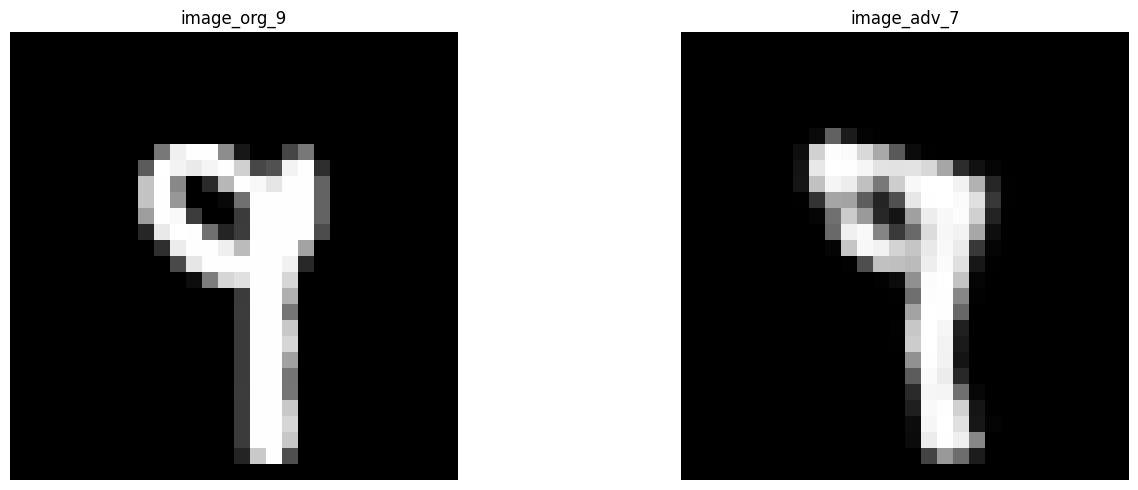

 26%|██▌       | 52/200 [05:24<13:09,  5.33s/it]

kl: 0.2737741681097142


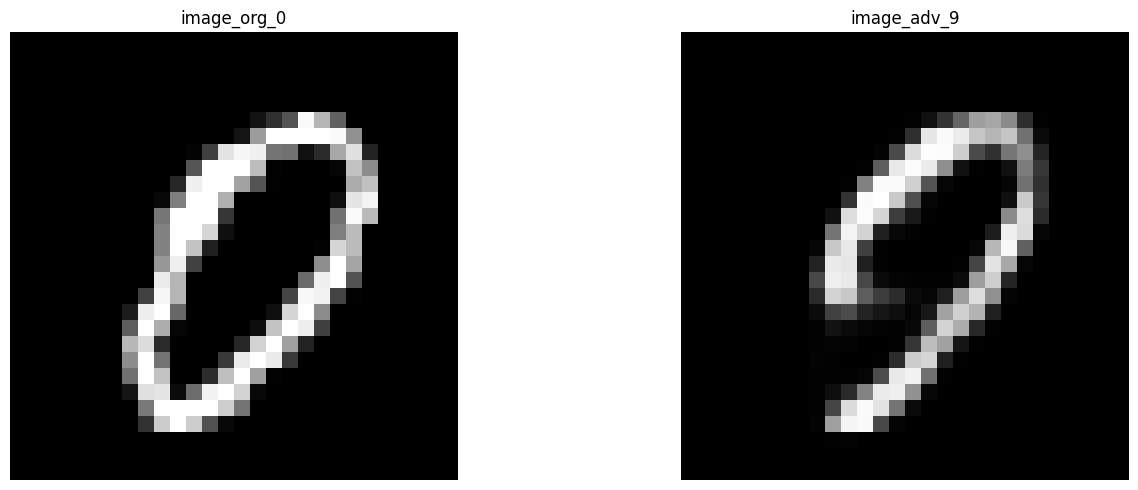

 26%|██▋       | 53/200 [05:31<14:23,  5.87s/it]

kl: 0.6851089858747351


 28%|██▊       | 56/200 [05:49<14:06,  5.88s/it]

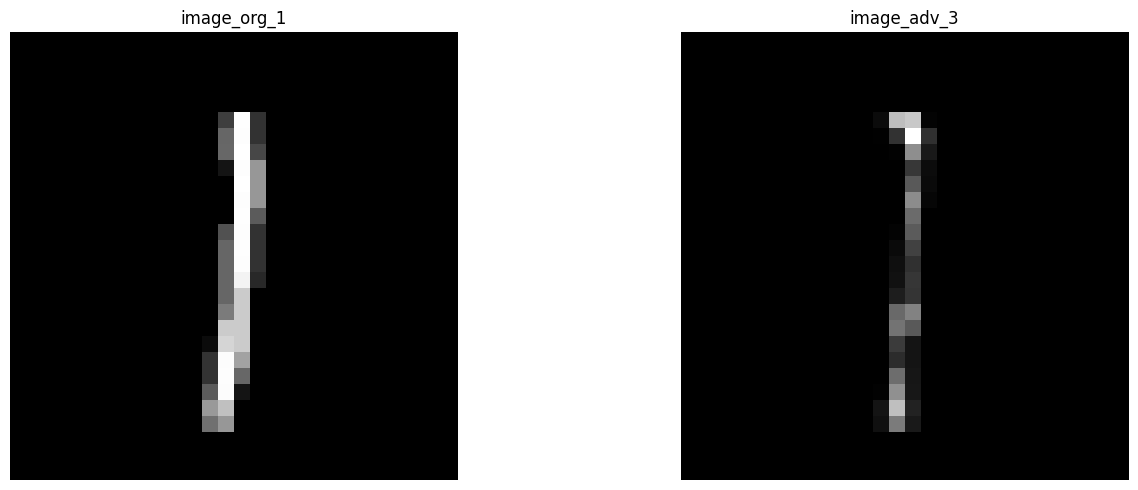

 28%|██▊       | 57/200 [05:55<14:16,  5.99s/it]

kl: 0.54208013958742


 29%|██▉       | 58/200 [06:01<14:02,  5.94s/it]

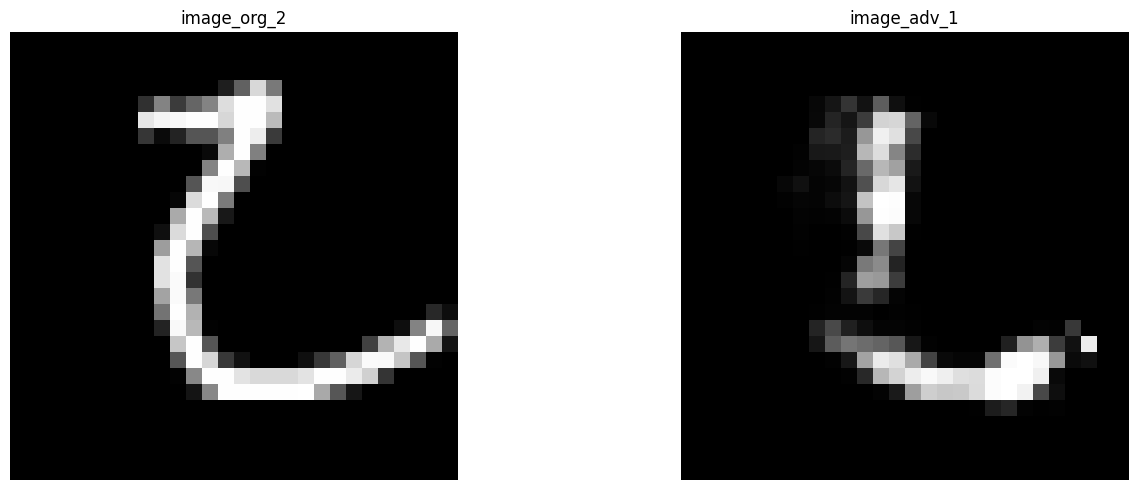

 30%|██▉       | 59/200 [06:06<13:12,  5.62s/it]

kl: 1.9692984433407976


 30%|███       | 60/200 [06:12<13:20,  5.72s/it]

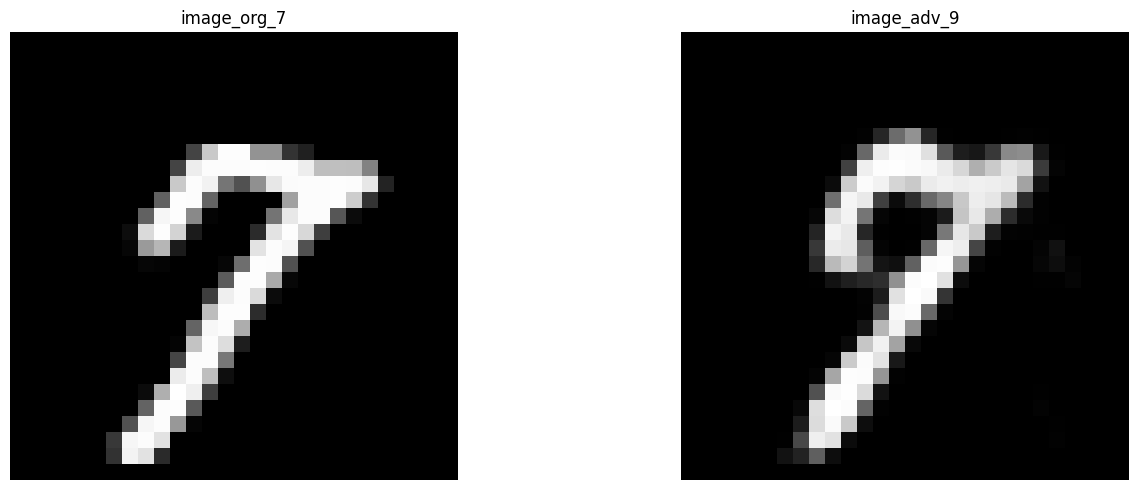

 30%|███       | 61/200 [06:15<11:15,  4.86s/it]

kl: 0.2396657394350366


 31%|███       | 62/200 [06:20<11:49,  5.14s/it]

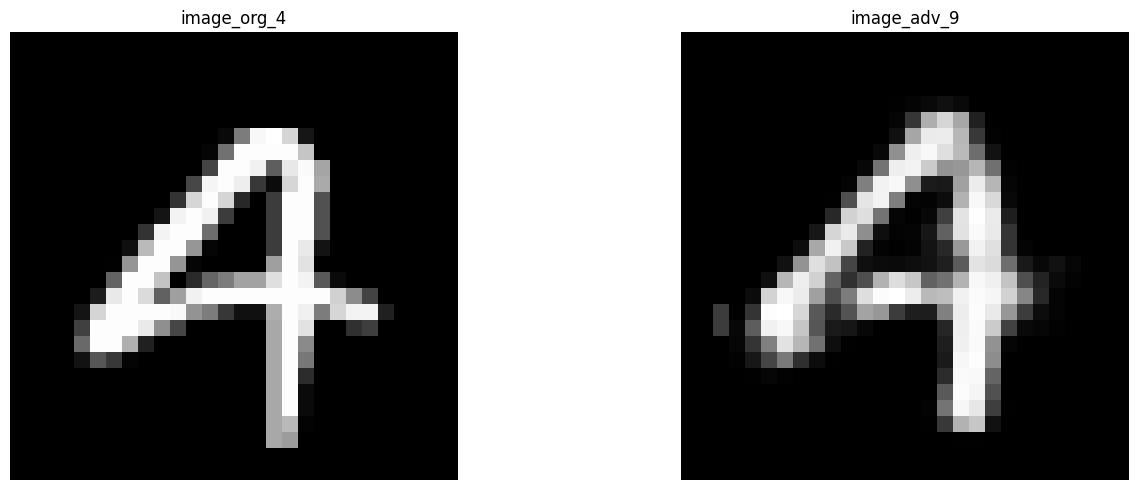

 32%|███▏      | 63/200 [06:22<09:27,  4.14s/it]

kl: 0.3338261858332338


 32%|███▏      | 64/200 [06:28<10:35,  4.68s/it]

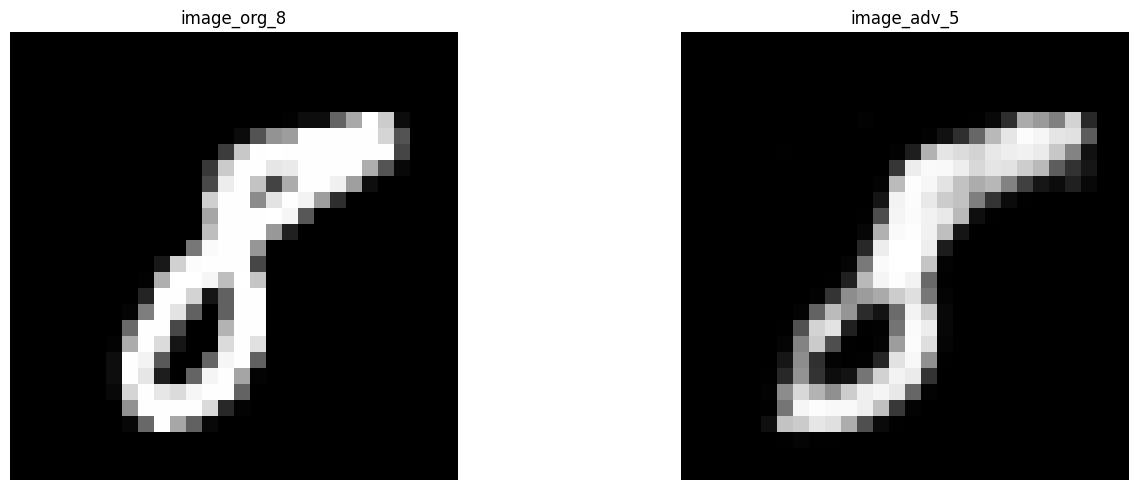

 32%|███▎      | 65/200 [06:36<12:52,  5.72s/it]

kl: 0.22769215839192083


 36%|███▋      | 73/200 [07:24<12:24,  5.87s/it]

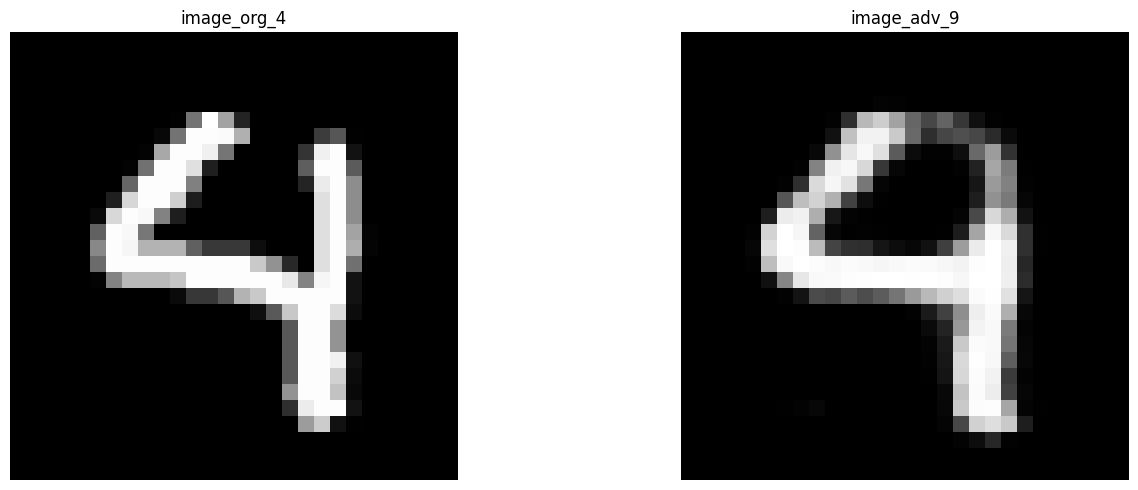

 37%|███▋      | 74/200 [07:26<10:01,  4.77s/it]

kl: 0.21983157640856668


 44%|████▎     | 87/200 [08:46<11:38,  6.18s/it]

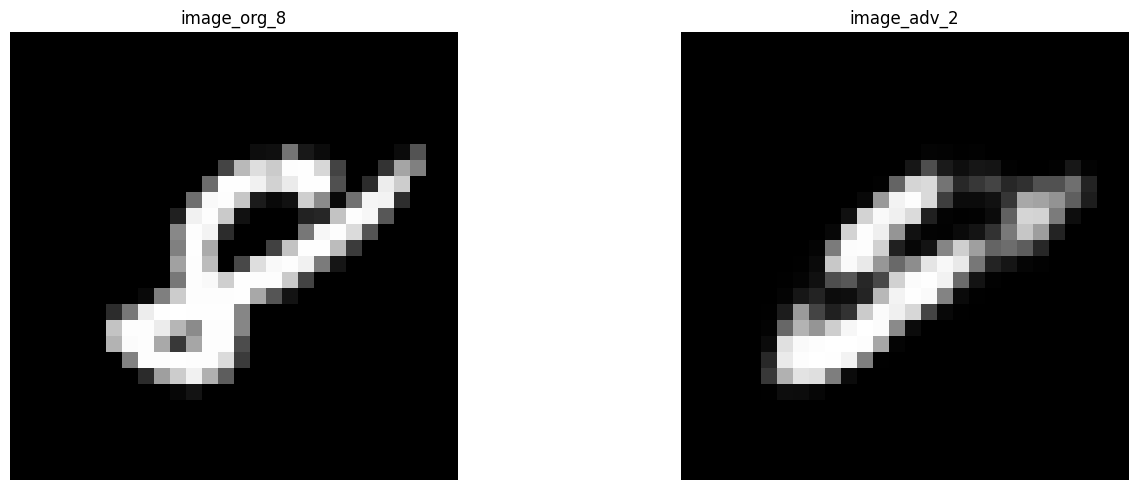

 44%|████▍     | 88/200 [08:53<12:07,  6.50s/it]

kl: 0.821792877872522


 52%|█████▏    | 104/200 [10:33<09:52,  6.17s/it]

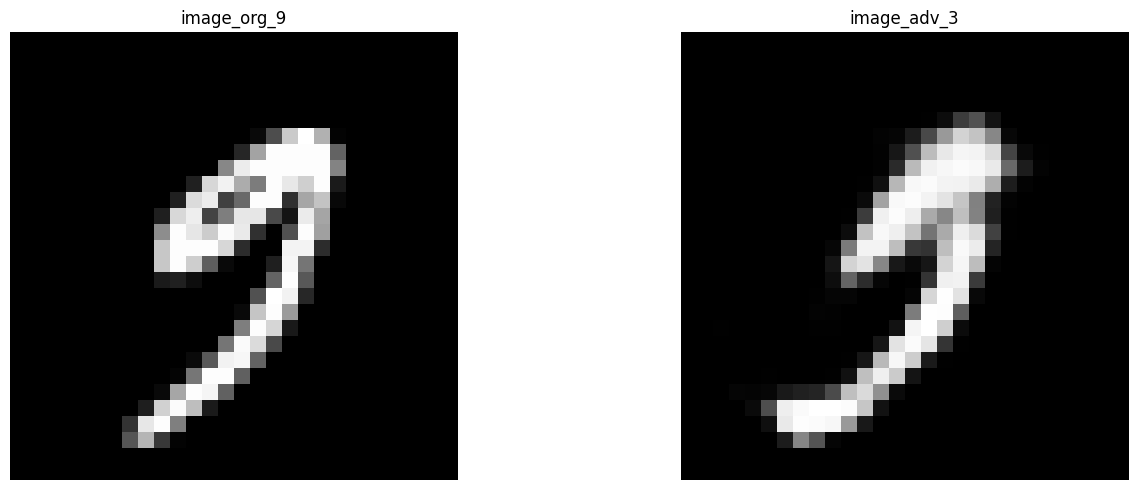

 52%|█████▎    | 105/200 [10:43<11:33,  7.30s/it]

kl: 0.43819052605512093


 54%|█████▎    | 107/200 [10:56<10:33,  6.81s/it]

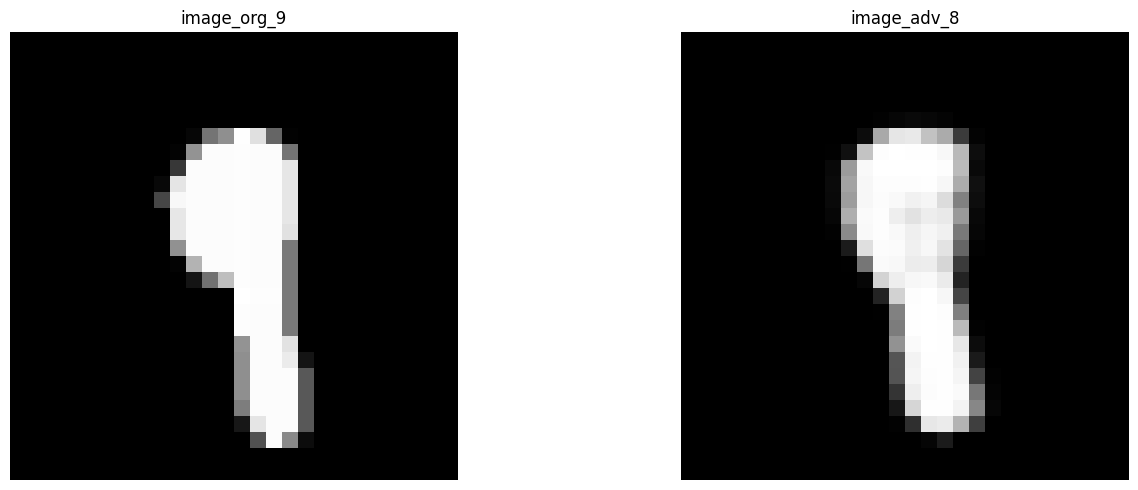

 54%|█████▍    | 108/200 [11:05<11:30,  7.51s/it]

kl: 0.12230061477367056


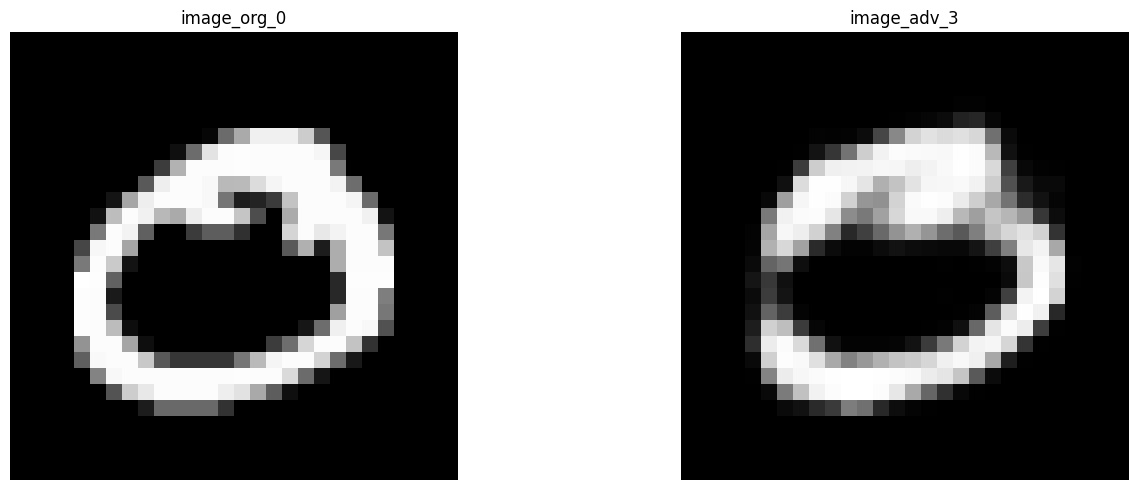

 55%|█████▍    | 109/200 [11:12<10:58,  7.24s/it]

kl: 0.24618208829460453


 56%|█████▌    | 112/200 [11:30<09:38,  6.58s/it]

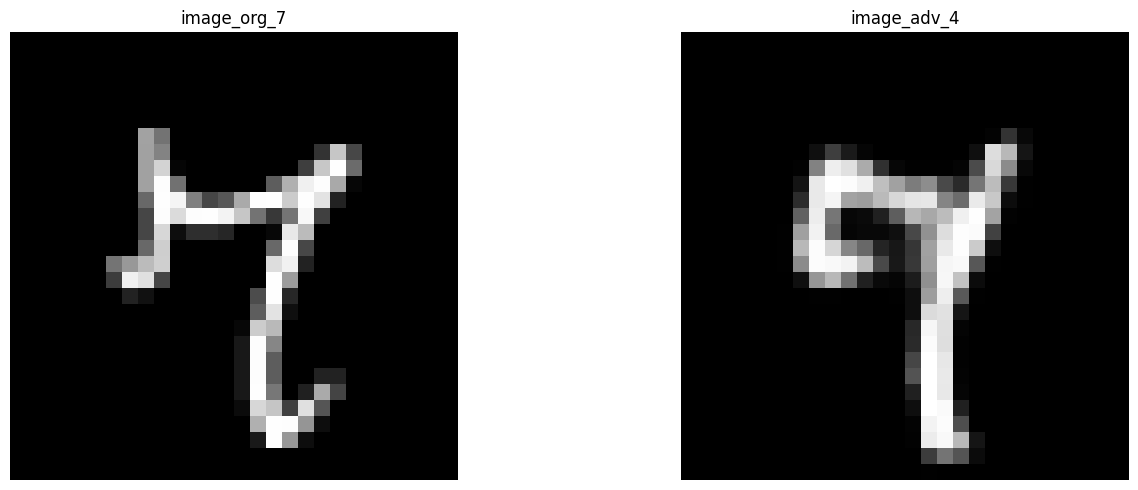

 56%|█████▋    | 113/200 [11:34<08:18,  5.73s/it]

kl: 0.98147045232494


 64%|██████▍   | 129/200 [13:11<06:56,  5.87s/it]

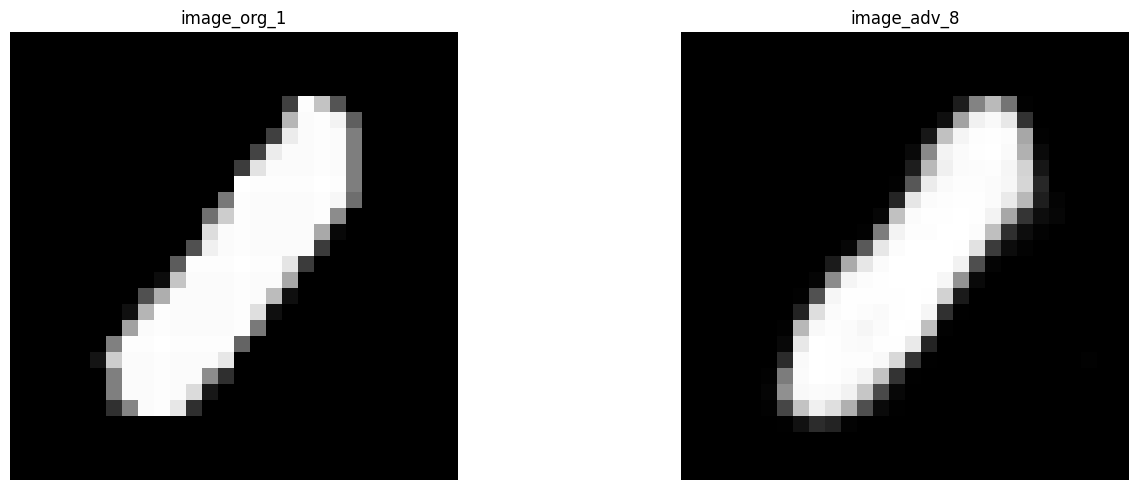

 65%|██████▌   | 130/200 [13:14<05:50,  5.01s/it]

kl: 0.06145921813702972


 69%|██████▉   | 138/200 [14:01<06:01,  5.83s/it]

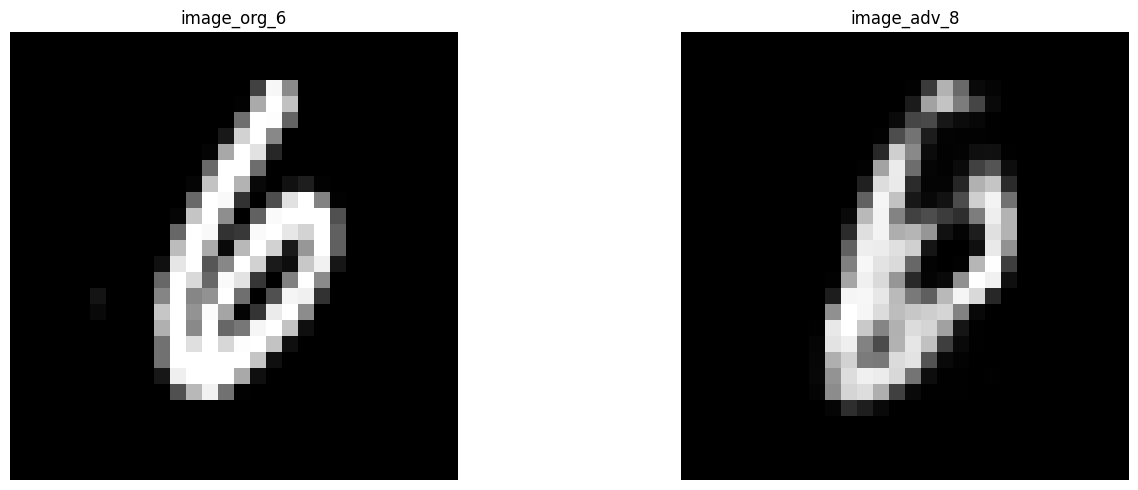

 70%|██████▉   | 139/200 [14:12<07:34,  7.45s/it]

kl: 0.4677788420056295


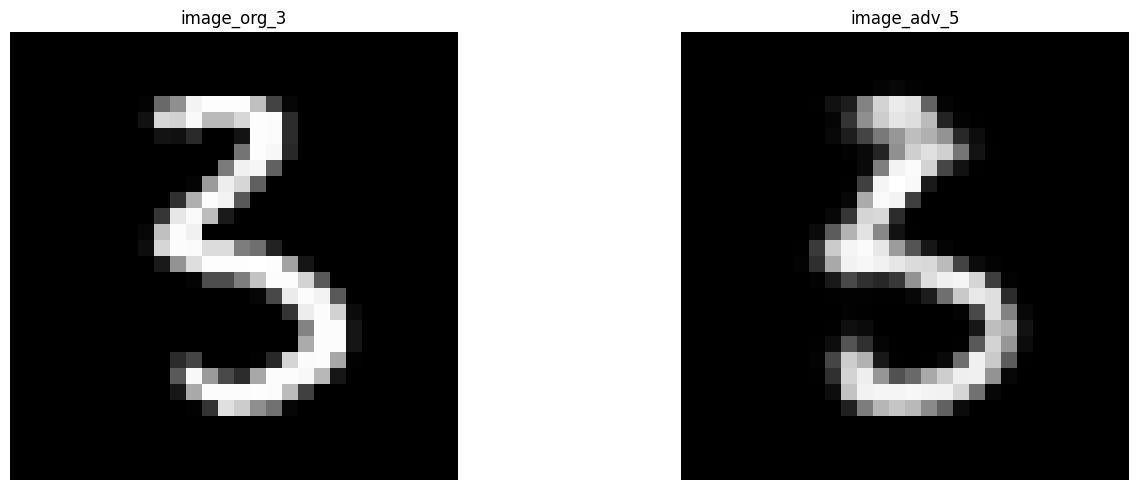

 70%|███████   | 140/200 [14:13<05:32,  5.55s/it]

kl: 0.24988262258943375


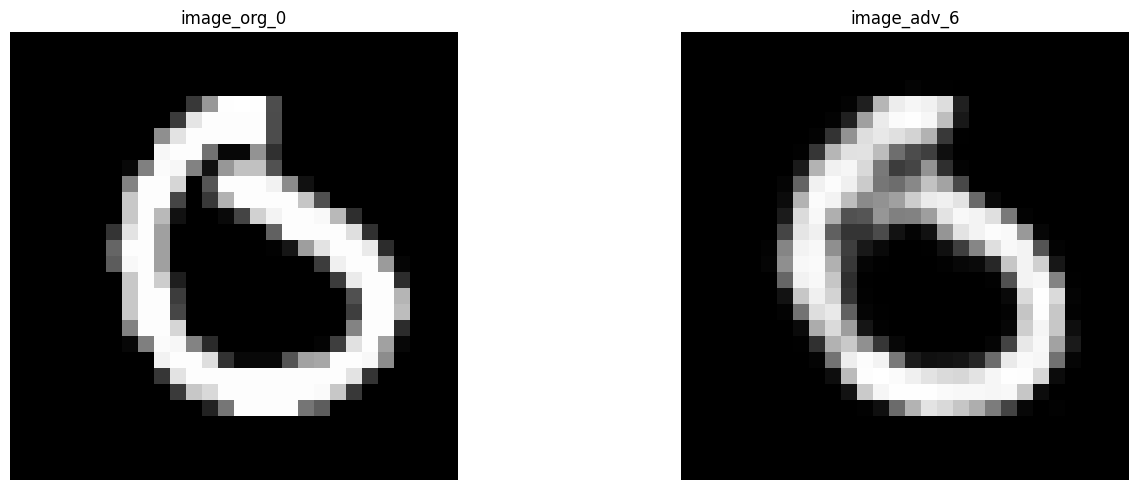

 70%|███████   | 141/200 [14:16<04:49,  4.91s/it]

kl: 0.15945077324118329


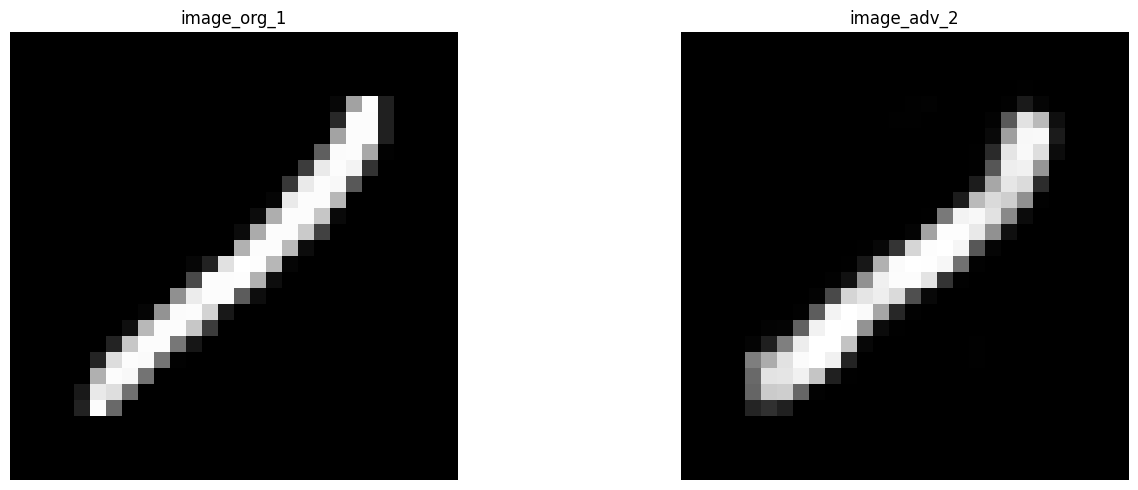

 71%|███████   | 142/200 [14:18<03:51,  3.99s/it]

kl: 0.2633615549571745


 72%|███████▏  | 143/200 [14:24<04:17,  4.52s/it]

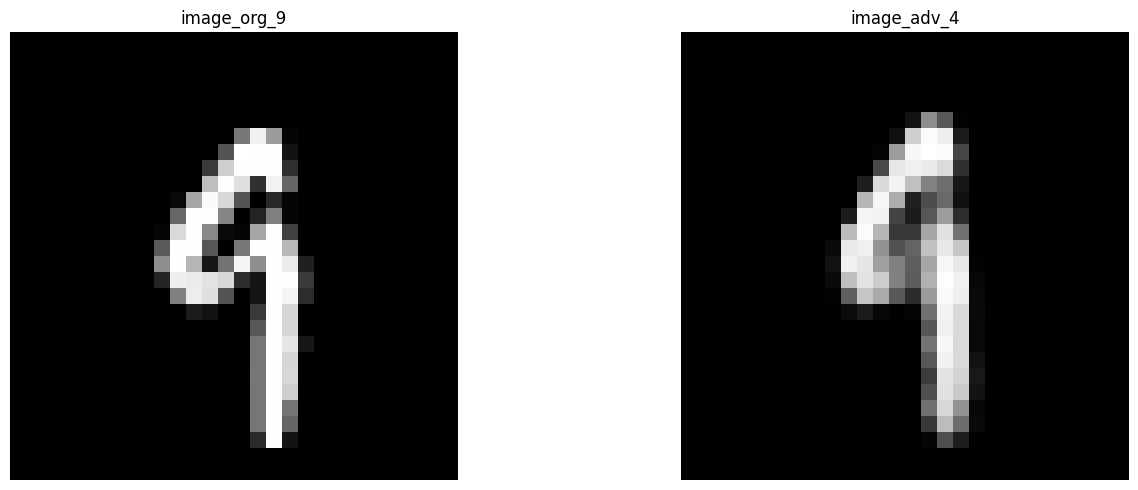

 72%|███████▏  | 144/200 [14:25<03:21,  3.60s/it]

kl: 0.1452999796441659


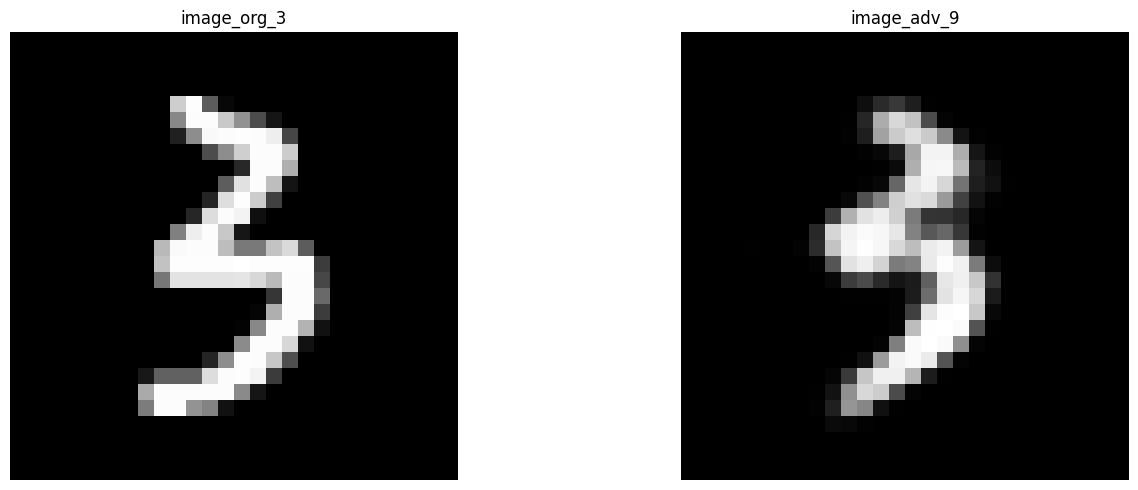

 72%|███████▎  | 145/200 [14:28<03:07,  3.41s/it]

kl: 0.4790821701581769


 80%|████████  | 160/200 [15:57<03:54,  5.86s/it]

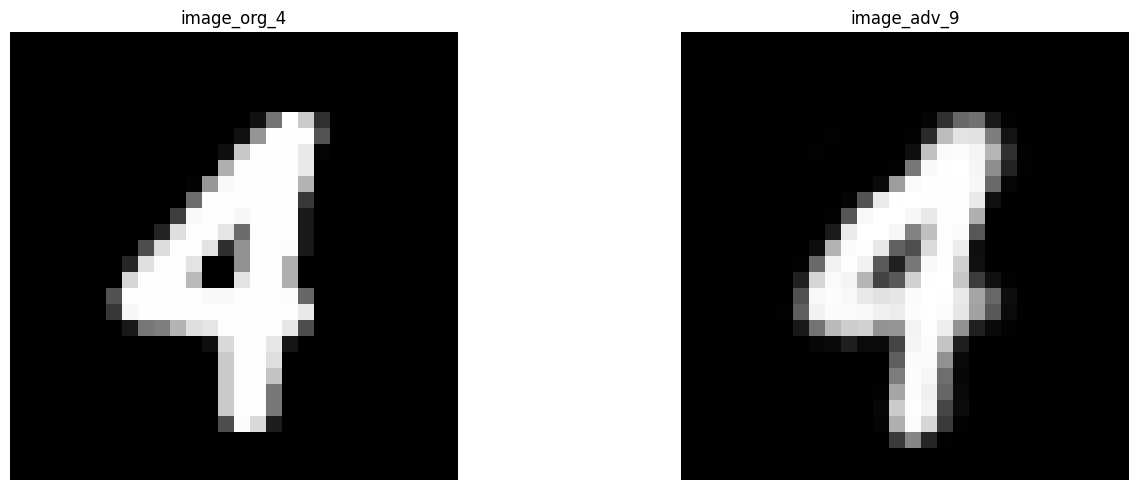

 80%|████████  | 161/200 [16:00<03:12,  4.93s/it]

kl: 0.15668232601701204


 81%|████████  | 162/200 [16:05<03:17,  5.19s/it]

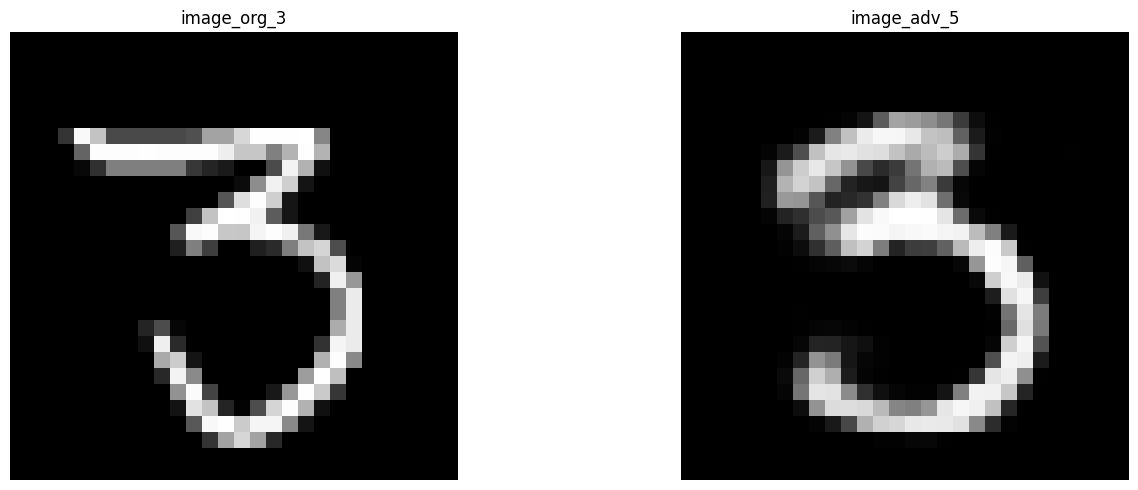

 82%|████████▏ | 163/200 [16:13<03:35,  5.82s/it]

kl: 0.9349281704300539


 90%|█████████ | 181/200 [17:59<01:53,  5.95s/it]

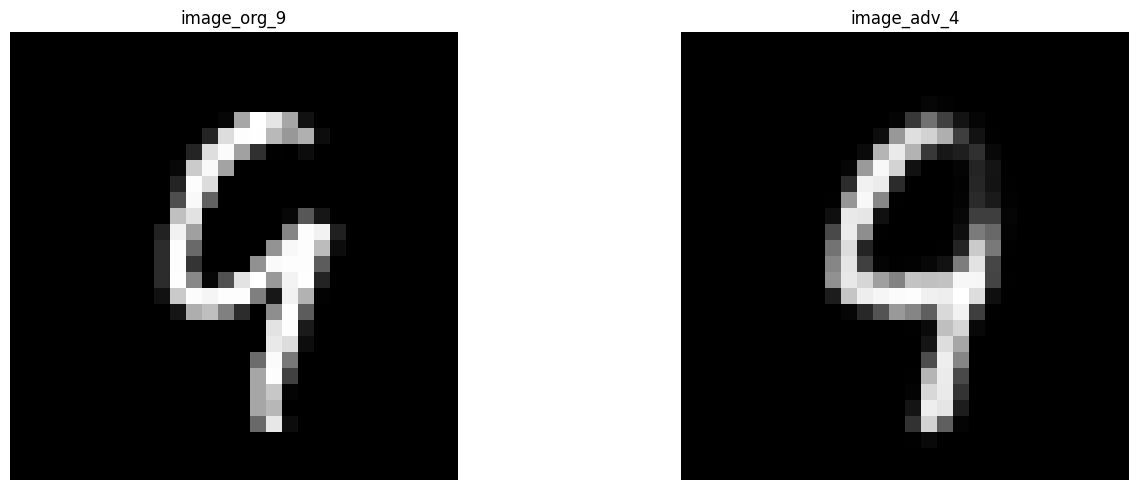

 91%|█████████ | 182/200 [18:00<01:23,  4.63s/it]

kl: 0.2791647650904237


 92%|█████████▏| 184/200 [18:13<01:27,  5.45s/it]

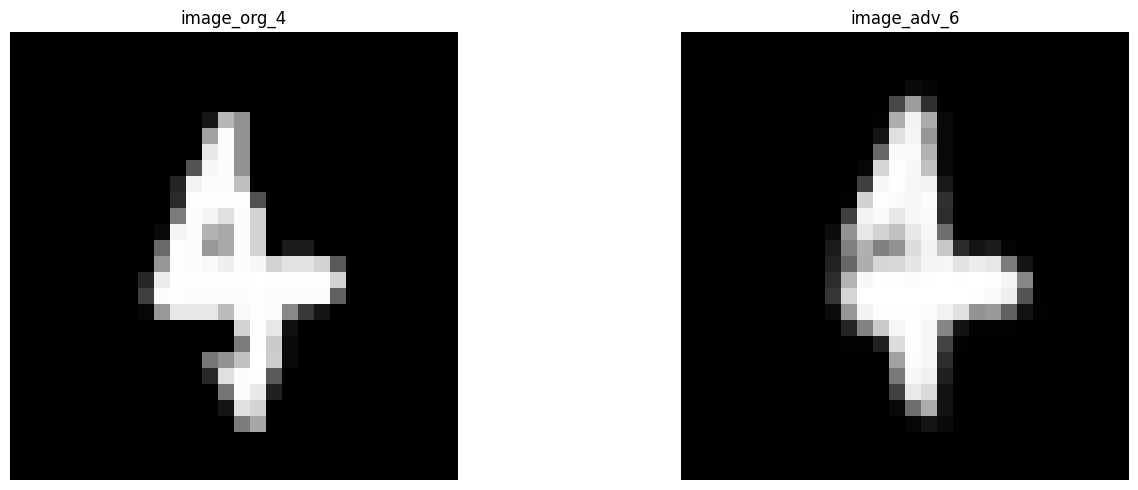

 92%|█████████▎| 185/200 [18:18<01:23,  5.55s/it]

kl: 0.2969088809989865


 96%|█████████▌| 191/200 [18:54<00:52,  5.88s/it]

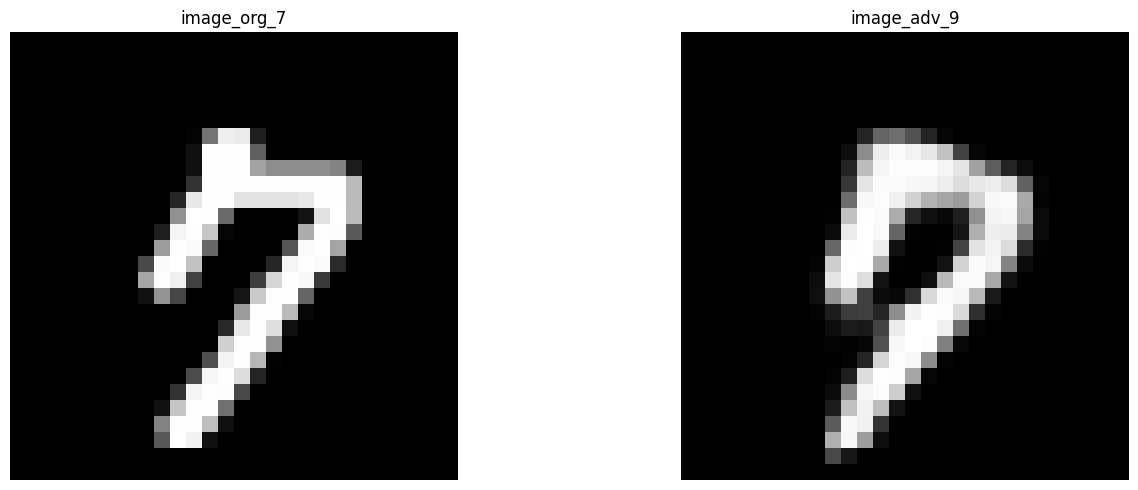

 96%|█████████▌| 192/200 [18:57<00:41,  5.15s/it]

kl: 0.17397954690065565


100%|██████████| 200/200 [19:46<00:00,  5.93s/it]


In [5]:
# start exp
for i in tqdm(range(len(samples))):
    # get original image
    image_org, label_org = samples[i], sample_labels[i]

    # image_adv = fgsm.generate_adversarial_image(image_org, y_onehot[i])
    # image_adv = dlfuzz.generate_adversarial_image(image_org)  # of shape (28, 28, 1)
    # image_adv = clhans.generate_adversarial_image(image_org)  # of shape (28, 28, 1)
    image_adv, _ = lava.generate_adversarial_image(image_org, y_onehot[i])

    label_adv = np.argmax(cnn.predict(np.array([image_adv]))[0])

    # List of images and their titles
    images = [image_org, image_adv]
    titles = [f'image_org_{label_org}', f'image_adv_{label_adv}']

    # Plot the images
    if label_adv != label_org:
        plot_image_comparison_two(images, titles)

        print(f"kl: {kl_divergence(image_org, image_adv)}")
        # print(f"ws: {ws_divergence(image_org, image_adv)}")
        # print(f"js: {js_divergence(image_org, image_adv)}")